In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../../Functions/')

from EDA_functions import ExploratoryDataAnalysis
eda = ExploratoryDataAnalysis()

In [2]:
pd.options.display.max_rows = 150 
pd.set_option("display.max_colwidth", 300)
plt.style.use('seaborn-darkgrid')

In [3]:
columns_desc = pd.read_csv('../../Datasets/HomeCredit_columns_description.csv', encoding = 'latin-1', index_col = 0)
columns_desc.replace('SK_ID_PREV ', 'SK_ID_PREV', inplace = True)

### 6. POS-Cash Balance

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.- **POS_CASH_balance.csv**: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [4]:
# reading the dataset
pos_cash_bal = pd.read_csv("../../Datasets/POS_CASH_balance.csv")

Firstly, let's analyze the shape of the dataset.

In [5]:
print("The POS-Cash Balance Set has %d rows and %d columns." % (
    pos_cash_bal.shape[0], pos_cash_bal.shape[1]))

The POS-Cash Balance Set has 10001358 rows and 8 columns.


In [6]:
columns_desc[columns_desc['Table'] == '../../Datasets/POS_CASH_balance.csv']

Empty DataFrame
Columns: [Table, Row, Description, Special]
Index: []

In [7]:
pos_cash_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

One could observe one categorical variable, 2 keys (SK_ID_PREV & SK_ID_CURR) and 5 numerical variables.

#### 6.A. Missing Values

Let's see how is the dataset in terms of missing values.

In [8]:
eda.missing_values(pos_cash_bal)

From 8 columns, there are 2 that have missing values in this dataset.


Number of Nulls Percentage of Nulls
CNT_INSTALMENT                   26071              0.261%
CNT_INSTALMENT_FUTURE            26087              0.261%

According to the analysis above, all features are in the pre-defined treshold of 25%. No features are excluded are therefore exlcuded from the dataset.

#### 6.B. Column Data Types

Let's check the data types that we have for this dataset.

In [9]:
pos_cash_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


We have 2 columns that are of type 'float', 5 of type 'int' and 1 of type 'object'. This means that we have 7 numerical variables and 1 categorical variable.

#### 6.C. Numerical Variables

In [10]:
np.array(pos_cash_bal.columns[pos_cash_bal.dtypes != 'object'])
num_var = ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']

All numerical variabels are plotted exluding the ID and SK_DPD feautere. The SK_DPD_DEF is the adjusted feature of SK_DPD on low amounts. Therefore SK_DPD_DEF is the prefered feature as it will contain less noise in the feature. 

In [11]:
print(pos_cash_bal['MONTHS_BALANCE'].describe().round(2))
eda.plot_hist(pos_cash_bal, 'MONTHS_BALANCE', 'Month of Balance Relative to Application Date')

count    10001358.00
mean          -35.01
std            26.07
min           -96.00
25%           -54.00
50%           -28.00
75%           -13.00
max            -1.00
Name: MONTHS_BALANCE, dtype: float64


The monthly balaces feature is left skewed with a maximum of 96 days and an average durartion of 35 days, 50% of the duraration is in the 28 days range.

count    9975287.00
mean          17.09
std           12.00
min            1.00
25%           10.00
50%           12.00
75%           24.00
max           92.00
Name: CNT_INSTALMENT, dtype: float64


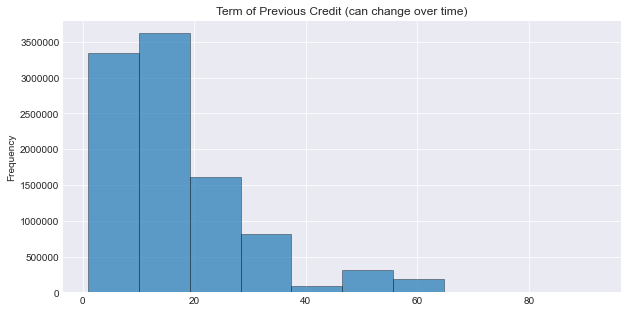

In [12]:
print(pos_cash_bal['CNT_INSTALMENT'].describe().round(2))
eda.plot_hist(pos_cash_bal, 'CNT_INSTALMENT', 'Term of Previous Credit (can change over time)')

The term of previous creditfeature has a log normal distribution with an average of 17 days and a maximum of 92.

In [13]:
print(pos_cash_bal['SK_DPD_DEF'].describe().round(2))
eda.plot_hist(pos_cash_bal, 'SK_DPD_DEF', 'DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit')

count    10001358.00
mean            0.65
std            32.76
min             0.00
25%             0.00
50%             0.00
75%             0.00
max          3595.00
Name: SK_DPD_DEF, dtype: float64


One could observe that the DPD during the month with tolerance feature consists of an outlier. The maximum value of the feature is 3595 eventhough the mean is 0.65

count    9975271.00
mean          10.48
std           11.11
min            0.00
25%            3.00
50%            7.00
75%           14.00
max           85.00
Name: CNT_INSTALMENT_FUTURE, dtype: float64


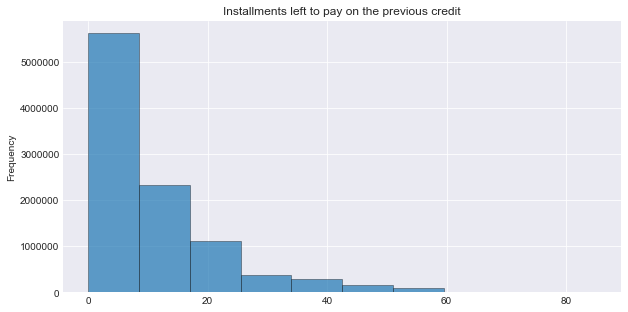

In [14]:
print(pos_cash_bal['CNT_INSTALMENT_FUTURE'].describe().round(2))
eda.plot_hist(pos_cash_bal, 'CNT_INSTALMENT_FUTURE', 'Installments left to pay on the previous credit')

The installments left to pay on the previous credit feature is right skewed with an avarage of 10.48 and maximum of 85.

#### 6.D. Categorical Variables

In [15]:
np.array(pos_cash_bal.columns[pos_cash_bal.dtypes == 'object'])

array(['NAME_CONTRACT_STATUS'], dtype=object)

In [16]:
pos_cash_bal.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_STATUS    9
dtype: int64

9 different catorical status are .. in the feature. Performing an one-hot encoding process will result in 9 different extra features 

In [17]:
pos_cash_bal['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

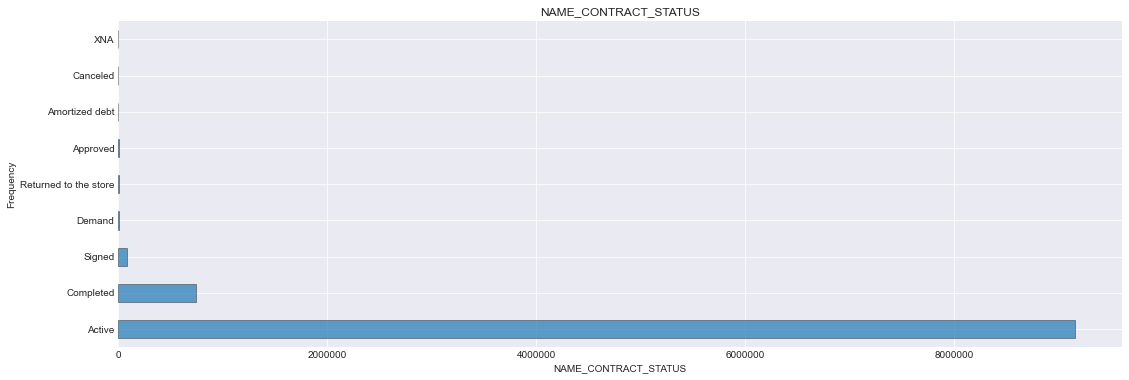

In [18]:
eda.plot_cat_freq(pos_cash_bal, 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_STATUS' )

Most of the status are active and the different categoeries are not nominal distributed which results in a unbalanced dataset.

#### 6.E. Correlations

In [19]:
corr = pos_cash_bal.iloc[:, 2:].corr()

In [20]:
corr

MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  \
MONTHS_BALANCE               1.000000        0.336163               0.271595   
CNT_INSTALMENT               0.336163        1.000000               0.871276   
CNT_INSTALMENT_FUTURE        0.271595        0.871276               1.000000   
SK_DPD                      -0.018939       -0.060803              -0.082004   
SK_DPD_DEF                  -0.000381       -0.014154              -0.017436   

                         SK_DPD  SK_DPD_DEF  
MONTHS_BALANCE        -0.018939   -0.000381  
CNT_INSTALMENT        -0.060803   -0.014154  
CNT_INSTALMENT_FUTURE -0.082004   -0.017436  
SK_DPD                 1.000000    0.245782  
SK_DPD_DEF             0.245782    1.000000

<div class="alert alert-danger">
    <b> FINAL REMARKS </b>
    <br> This is to summarize what were the conclusions for this dataset (the things that must be done in the data cleaning). TO DELETE ONCE THE DATA CLEANING IS DONE. </br>
    <p> </p>
    <p> i) Removing outlier of SK_DPD_DEF</p>
    <p> ii) Add count of overdue payments per id</p>
    <p> iii) Export dataset</p>
</div>

#### Cleansing

Removing every observation that is furter than 3 standardivation. 

In [30]:
pos_cash_bal_3std = pos_cash_bal['SK_DPD_DEF'].std()*3

In [31]:
cleansed_dataset = pos_cash_bal[pos_cash_bal['SK_DPD_DEF'] < pos_cash_bal_3std]
cleansed_dataset

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[9996722 rows x 8 columns]

#### Feature engineering

In [32]:
eda.count_overdue(cleansed_dataset)

cleansed_dataset.groupby('OVERDUE_ACTIVE_COUNT').size()

../../Functions\EDA_functions.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[name_flag] = dataset.apply(fun,axis=1)
../../Functions\EDA_functions.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[name] = dataset.groupby('SK_ID_CURR')[name_flag].transform('sum')
../../Functions\EDA_functions.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

OVERDUE_ACTIVE_COUNT
1     8060136
2      934974
3      379702
4      208632
5      124660
6       82334
7       55240
8       36827
9       26900
10      21629
11      15070
12      10962
13       9472
14       6799
15       6240
16       3138
17       2606
18       1893
19       1737
20       1526
21       1188
22        805
23       1274
24        928
25        319
26        135
27        288
28         61
29         84
30         87
31        224
32        220
34         58
35        442
44        132
dtype: int64

In [33]:
eda.count_completed(cleansed_dataset)
cleansed_dataset.groupby('COMPLETED_COUNT').size()

../../Functions\EDA_functions.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[name_flag] = dataset['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x =='Completed'  else 0)
../../Functions\EDA_functions.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[name] = dataset.groupby('SK_ID_CURR')[name_flag].transform('sum')
../../Functions\EDA_functions.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

COMPLETED_COUNT
1      517693
2     1912663
3     2142474
4     1775696
5     1287739
6      861696
7      547466
8      337344
9      210464
10     123505
11      72800
12      42444
13      27987
14      16796
15       9799
16       5795
17       3624
18       2476
19       1792
20        396
21        782
22        551
23         96
25        246
43         73
46        100
47        496
48        423
49       5420
50       5846
51       5246
52      12182
53      12176
54       8968
55       7321
56       5329
57       6927
58       5974
59       5348
60       3451
61       3005
62       3289
63       1215
64        482
65        185
66        163
68        181
78         82
79        102
82        203
86        118
87         93
dtype: int64

In [34]:
#get the minimum, maximum, average and standard deviation
fun = ['min', 'max', 'mean','std']
fun_df = cleansed_dataset.groupby('SK_ID_CURR')[num_var].agg(fun)
fun_df.columns = ["{}_{}".format(c[0],c[1].upper()) for c in fun_df.columns.values.tolist()] 
fun_df

MONTHS_BALANCE_MIN  MONTHS_BALANCE_MAX  MONTHS_BALANCE_MEAN  \
SK_ID_CURR                                                                
100001                     -96                 -53           -72.555556   
100002                     -19                  -1           -10.000000   
100003                     -77                 -18           -43.785714   
100004                     -27                 -24           -25.500000   
100005                     -25                 -15           -20.000000   
...                        ...                 ...                  ...   
456251                      -9                  -1            -5.000000   
456252                     -82                 -76           -79.000000   
456253                     -96                 -57           -79.235294   
456254                     -11                  -1            -5.550000   
456255                     -33                  -2           -16.408451   

            MONTHS_BALANCE_STD  CNT_INSTALMENT_MIN  CNT_INSTALMENT_MAX  \
SK_ID_CURR                                                               
100001               20.863312                 4.0                 4.0   
100002                5.627314                24.0                24.0   
100003               24.640162                 6.0                12.0   
100004                1.290994                 3.0                 4.0   
100005                3.316625                 9.0                12.0   
...                        ...                 ...                 ...   
456251                2.738613                 7.0                 8.0   
456252                2.160247                 6.0                 6.0   
456253               16.723970                 4.0                12.0   
456254                3.034451                14.0                16.0   
456255                7.426935                 3.0                36.0   

            CNT_INSTALMENT_MEAN  CNT_INSTALMENT_STD  \
SK_ID_CURR                                            
100001                 4.000000            0.000000   
100002                24.000000            0.000000   
100003                10.107143            2.806597   
100004                 3.750000            0.500000   
100005                11.700000            0.948683   
...                         ...                 ...   
456251                 7.875000            0.353553   
456252                 6.000000            0.000000   
456253                 6.705882            3.157624   
456254                14.900000            1.020836   
456255                22.788732           11.257906   

            CNT_INSTALMENT_FUTURE_MIN  CNT_INSTALMENT_FUTURE_MAX  \
SK_ID_CURR                                                         
100001                            0.0                        4.0   
100002                            6.0                       24.0   
100003                            0.0                       12.0   
100004                            0.0                        4.0   
100005                            0.0                       12.0   
...                               ...                        ...   
456251                            0.0                        8.0   
456252                            0.0                        6.0   
456253                            0.0                        6.0   
456254                            4.0                       16.0   
456255                            0.0                       36.0   

            CNT_INSTALMENT_FUTURE_MEAN  CNT_INSTALMENT_FUTURE_STD  SK_DPD_MIN  \
SK_ID_CURR                                                                      
100001                        1.444444                   1.424001           0   
100002                       15.000000                   5.627314           0   
100003                        5.785714                   3.842811           0   
100004                        2.250000                   1.707825  

In [35]:
features= ['COMPLETED_COUNT','OVERDUE_ACTIVE_COUNT']
cleansed_dataset = cleansed_dataset.groupby('SK_ID_CURR').first()[features].reset_index()
cleansed_dataset

SK_ID_CURR  COMPLETED_COUNT  OVERDUE_ACTIVE_COUNT
0           100001                3                     2
1           100002                1                     1
2           100003                3                     1
3           100004                2                     1
4           100005                2                     1
...            ...              ...                   ...
337245      456251                2                     1
337246      456252                2                     1
337247      456253                3                     2
337248      456254                1                     1
337249      456255                7                     2

[337250 rows x 3 columns]

In [36]:
cleansed_dataset

SK_ID_CURR  COMPLETED_COUNT  OVERDUE_ACTIVE_COUNT
0           100001                3                     2
1           100002                1                     1
2           100003                3                     1
3           100004                2                     1
4           100005                2                     1
...            ...              ...                   ...
337245      456251                2                     1
337246      456252                2                     1
337247      456253                3                     2
337248      456254                1                     1
337249      456255                7                     2

[337250 rows x 3 columns]

In [37]:
final_dataset = cleansed_dataset.merge(fun_df,
                                      how='left', 
                                      on='SK_ID_CURR',
                                      validate='one_to_one')
final_dataset

SK_ID_CURR  COMPLETED_COUNT  OVERDUE_ACTIVE_COUNT  MONTHS_BALANCE_MIN  \
0           100001                3                     2                 -96   
1           100002                1                     1                 -19   
2           100003                3                     1                 -77   
3           100004                2                     1                 -27   
4           100005                2                     1                 -25   
...            ...              ...                   ...                 ...   
337245      456251                2                     1                  -9   
337246      456252                2                     1                 -82   
337247      456253                3                     2                 -96   
337248      456254                1                     1                 -11   
337249      456255                7                     2                 -33   

        MONTHS_BALANCE_MAX  MONTHS_BALANCE_MEAN  MONTHS_BALANCE_STD  \
0                      -53           -72.555556           20.863312   
1                       -1           -10.000000            5.627314   
2                      -18           -43.785714           24.640162   
3                      -24           -25.500000            1.290994   
4                      -15           -20.000000            3.316625   
...                    ...                  ...                 ...   
337245                  -1            -5.000000            2.738613   
337246                 -76           -79.000000            2.160247   
337247                 -57           -79.235294           16.723970   
337248                  -1            -5.550000            3.034451   
337249                  -2           -16.408451            7.426935   

        CNT_INSTALMENT_MIN  CNT_INSTALMENT_MAX  CNT_INSTALMENT_MEAN  ...  \
0                      4.0                 4.0             4.000000  ...   
1                     24.0                24.0            24.000000  ...   
2                      6.0                12.0            10.107143  ...   
3                      3.0                 4.0             3.750000  ...   
4                      9.0                12.0            11.700000  ...   
...                    ...                 ...                  ...  ...   
337245                 7.0                 8.0             7.875000  ...   
337246                 6.0                 6.0             6.000000  ...   
337247                 4.0                12.0             6.705882  ...   
337248                14.0                16.0            14.900000  ...   
337249                 3.0                36.0            22.788732  ...   

        CNT_INSTALMENT_FUTURE_MEAN  CNT_INSTALMENT_FUTURE_STD  SK_DPD_MIN  \
0                         1.444444                   1.424001           0   
1                        15.000000                   5.627314           0   
2                         5.785714                   3.842811           0   
3                         2.250000                   1.707825           0   
4                         7.200000                   3.614784           0   
...                            ...                        ...         ...   
337245                    4.375000                   2.669270           0   
337246                    3.000000                   2.160247           0   
337247                    2.000000                   1.903943           0   
337248                   10.350000                   3.360373           0   
337249                   15.140845                   9.921543           0   

        SK_DPD_MAX  SK_DPD_MEAN  SK_DPD_STD  SK_DPD_DEF_MIN  SK_DPD_DEF_MAX  \
0                7     0.777778    2.333333               0               7   
1                0     0.000000    0.000000               0               0   
2                0     0.000000    0.000000               0               0   
3                0     0.000

#### Exporting Dataset

In [38]:
col_name = []
for c in final_dataset.columns:
    if c =='SK_ID_CURR':
        col_name.append(c)
    else:
        col_name.append("POS_BAL_"+c)

final_dataset.columns = col_name

In [39]:
final_dataset.to_csv('../2_final_pos_cash.csv',index=False)